In [106]:
#create a 'show code' button to show/hide code cells
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form''')

# from IPython.display import HTML

# hide_me = ''
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#   if (code_show) {
#     $('div.input').each(function(id) {
#       el = $(this).find('.cm-variable:first');
#       if (id == 0 || el.text() == 'hide_me') {
#         $(this).hide();
#       }
#     });
#     $('div.output_prompt').css('opacity', 0);
#   } else {
#     $('div.input').each(function(id) {
#       $(this).show();
#     });
#     $('div.output_prompt').css('opacity', 1);
#   }
#   code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import matplotlib as mpl
import ipywidgets as widgets
from ipywidgets import interact, interactive



'''Above, we are importing all the necessary modules in order to run the notebook. 
Numpy allows us to define arrays of values for our variables to plot them
matplotlib is what we use to create the figures
the display and widgets are to make the notebook look neat

'''

#matplotlib notebook allows for interactive figure windows, as compared to static windows with matolotlib inline
%matplotlib notebook
%matplotlib notebook

# Introduction

 In this notebook we will reveiw the basics of polynomial functions, and then examine how to solve the intervals where a given polynomial is $P(x)$ $\leq 0$ or $P(x)$ $\geq 0$. We will look at how changing certain parameters (specifically the constant term) of a polynomial changes the shape of its graph, and the intervals on which equalities are satisfied.

## Polynomials


A polynomial is a function comprised of constants and variables. The constants and variables can be related to each other  by addition, multiplication and exponentiation to a non-negative integer power [[https://en.wikipedia.org/wiki/Polynomial][1]]. In this notebook, we will let $P(x)$ denote a general polynomial, and we will only deal with polynomials of a single variable $x$. 

In general, a polynomial is expressed as:</br>

$P(x) = c_0x^n + c_1x^{n-1} + c_2x^{n-2} + ... + c_{n-1}x + c_n = \Sigma^n_{k=0}a_kx^k$

where $c_i$ are *constant terms*, $x$ is the variable. The largest value of $n$ ( i.e. the largest exponent of the polynomial) determines the *degree* of the polynomial. For example, some polynomials of degree *three* ($n=3$) could be:</br>

$P(x) = x^3 + 2x^2 + 5x + 4$</br>

$P(x) = 3x^3 + 8x $</br>

$P(x) = x^3 + x^2 + 4$</br>

Note how the number of terms **does not** effect the degree of the polynomial, only the value of the largest exponent does. 

A polynomial with degree *0* is called a *constant polynomial*, or just a *constant*. This is because of the mathematical identity

$x^0 = 1$,

so if we have any polynomail of degree 0, we have

$P(x) = c_1x^0 + c_2 = c_1 + c_2 = C$,

which of course is just a constant (i.e. some number, $C$).

While we will only be dealing with singe variable polynomials, it is worth noting that they can exist with *multiplt variables*, i.e.

$P(x,y,z) = x^3 - xy^2 + z^6 -3x^2y^6z^4 +2$

[1]:https://en.wikipedia.org/wiki/Polynomial

In [80]:

#display(Latex('...')) will print the string in the output cell, in a nice font, and allows for easily inputing Math symbos and equations
display(Latex('From the list of funcitons below, check which ones are polynomials:'))

#define a series of checkboxes to test knowledge of  polynomial forms
a=widgets.Checkbox(
    value=False, #a false value meand unchecked, while a checked value will be "True'" 
    description=r'$x^2+5x-8x^3$', #use r'' to make a raw stringas button description
    disabled=False
)

b=widgets.Checkbox(
    value=False,
    description=r'$x+3$',
    disabled=False
)
c=widgets.Checkbox(
    value=False,
    description=r'$\sin(x) + \cos(x)$',
    disabled=False
)
d=widgets.Checkbox(
    value=False,
    description=r'$x^5 - 2$',
    disabled=False
)

e=widgets.Checkbox(
    value=False,
    description=r'$\ln(x)$',
    disabled=False
)

f=widgets.Checkbox(
        value=False,
        description=r'$100$',
    disabled=False
)

#to actually display the buttons, we need to use the IPython.display package, and call each button as the argument
display(a)
display(b)
display(c)
display(d)
display(e)
display(f)

#create a button widget to check answers, again calling the button to display
button_check = widgets.Button(description="check")
display(button_check)

#a simple funciton to determine if user inputs are correct
def check_button(x):
    if a.value==True and b.value==True and c.value==False and d.value==True and e.value==False and f.value==True: #notebook will display 'correct'  message  IF (and only if) each of the boxes satisfy these value conditions 
        display(Latex('Correct - these are all polynomials!'))
    else: #if any of the checkboxes have the incorrect value, output will ask user to try again
        display(Latex("Not quite - either some of your selections aren't polynomials, or some of the options you didn't select are. Check your answers again!"))
button_check.on_click(check_button)

    

<IPython.core.display.Latex object>

Checkbox(value=False, description='$x^2+5x-8x^3$')

Checkbox(value=False, description='$x+3$')

Checkbox(value=False, description='$\\sin(x) + \\cos(x)$')

Checkbox(value=False, description='$x^5 - 2$')

Checkbox(value=False, description='$\\ln(x)$')

Checkbox(value=False, description='$100$')

Button(description='check', style=ButtonStyle())

# Intervals of inequalities

Given a polynomial $P(x)$, we can determine the range in which that polynomial satisfies a certain inequality. For example, consider the polynomial function

$P(x) = x^2 + 4x$.

For which values of $x$ is the inequality

$P(x) \leq -3$ 

satisfied?

We can solve this algebraically, as follows:

1. Write the polynomial in standard form:   $x^2 + 4x + 3 \leq 0 $
    
2. Factor the polynomial:   $(x+1)(x+3) \leq 0$

3. Find the critical valiues (x-intercepts):   $x=-1, x=-3$

4. Test the polynomial on each side of the critical points to determine if the inequality is satisfied:

    a. At $x=-2$, $P(x) = (-2)^2 + 4(-2) = -4$, which satisfies the given inequality
    
    b. At $x=-4$, $P(x) = (-4)^2 + 4(-4) = 0$, which does **not** satisfiy the inequality
    
    c. At $x=0$  $P(x) = 0$, which does **not** satisfy the inequality.
        
5. So we can see that the inequality is saisfied on the interval from $-3$ to $-1$, or in *interval notation* , the solution is : **[-3,-1]**

We can visualize the solution on a graph as well. 


        

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


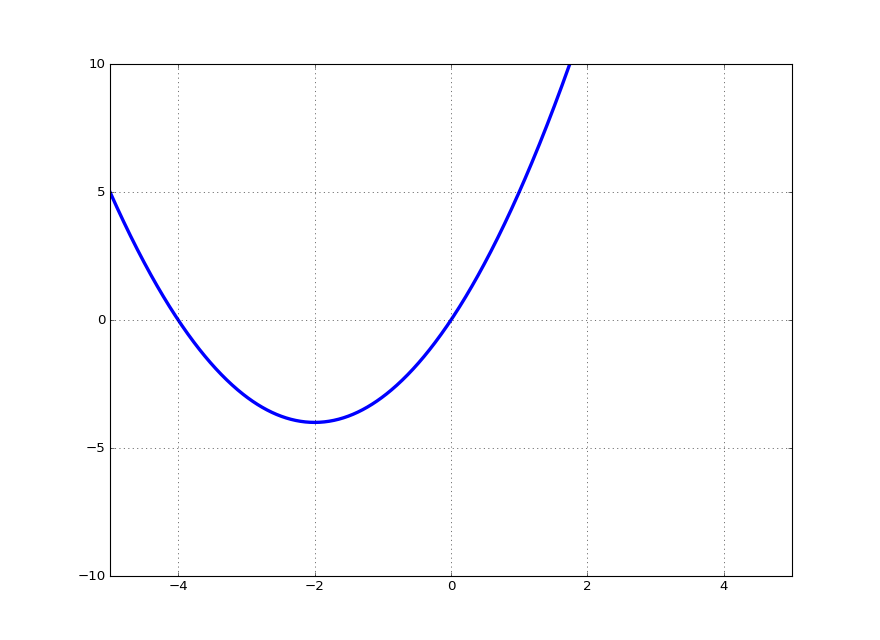

Button(description='draw!', style=ButtonStyle())

In [3]:
%matplotlib notebook
%matplotlib notebook

display(Latex('Here is a graph of the polynomial $P(x) = x^2 + 4x$'))

display(Latex("We're trying to solve where this polynomial is $\leq -3$, so let's draw a line at y=-3  to help visualiz this. (press the 'draw' button)"))

x = np.linspace(-5,5,1000); #define a vector space for the variable x

#this block will create an interactive figure of the polynomial
plt.figure(figsize=(11,8)) #define the figure window size
plt.plot(x,x**2 + 4*x, linewidth=3); #plot the polynomial as a funciton of x
plt.xlim([-5,5]); #adjust the limits of the y and x axes of the figure for readability
plt.ylim([-10,10]);
plt.grid(True); #place a grid on the figure for readability

#create a button to draw a line at y=0 when clicked
button = widgets.Button(description="draw!")

#function to produce the plot when the button is clicked
def on_button_clicked(b):
    plt.plot(x,np.ones(len(x))*-3, linewidth=3); #plot the y=0 line
    display(Latex('Can you see where the inequality is satisfied?'))
    display(Latex("Zoom in (with the 'box' icon) to find where the lines intersect. We can see that they are the same values as we calculated above."))
    display(Latex("Pressing the 'shade' button will shade in the interval where the inequailty is satisfied on the graph"))
    display(button2) #display a second button after the line is drawn

# create a button to shade the satisfied interval on the figure
button2 = widgets.Button(description='shade')

#function to shade the region between x = -3 and x= -1 when button 2 is clicked
def shade_click(b):
    plt.axvspan(-3,-1,facecolor='#2ca02c', alpha=0.5)
    display(Latex("We can see that the interval for which $P(x) \leq -3$ is again [-3,-1], agreeing with our algebraic solution."))

display(button) #display the first button below the figure window

button.on_click(on_button_clicked)
button2.on_click(shade_click)






# Constant term and leading coeffecient


The **constant term** of a polynomial is the term in which the variable does not appear (i.e. the degree $0$ term). For exmaple, the constant term for the polynomial 

$P(x) = x^3 + 2x^2 + 5x + 4$,</br>

is $4$.

Let's look at how changing the constant term changes the graph of the polynomial. We will consider the same polynomial as before, but this time we will let $k$ be an arbitrary value for the constant term. 



In [4]:
%matplotlib inline 
#we're using sliders to change figures in this cell, which works more smoothly with 'inline' figures instead of 'notebook', so we switch to inline for this cell

display(Latex('Adjust the value of $k$ using the slider. What do you notice about the graph as the value changes?'))

x = np.linspace(-5,5)

#define function to create a graph of a polynomial
def Plot_poly(k=0): #we make the python function a function of the variable 'k', which we will use as the constant term in the polynomial
    plt.figure(figsize=(11,8))
    plt.plot(x,x**3 + 2*x**2 + 5*x + k) #here is the variable k
    plt.grid(True)
    plt.ylabel('P(x)', fontsize=20)
    plt.xlabel('x', fontsize=20)
    plt.xlim([-5,5])
    plt.title('Graph of polynomial $P(x) = x^3 + 2x^2 + 5x + k$', fontsize=20)
    plt.show()
    
interact(Plot_poly,k=(1,20)); #use the IPython interact function to create a slider to adjust the value of 'k' for the plot

display(Latex('Try doing the same with other polynomials. Is there a similar, or different behaviour?'))


<IPython.core.display.Latex object>

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), Output()), _dom_classes=('widget-int…

<IPython.core.display.Latex object>

In [5]:
display(Latex('Provide the order of polynomial you wish to plot (between 1 and 3):'))
poly_order = int(input()) #input variable to define the prder of the ploynomial

if poly_order == 1:
    display(Latex('Provide a value for $a$ in the polynomial $P(x) = ax + k$:'))
    a = int(input()) #input variable for coeffecient(s) of polynomial
    custom_poly = a * x #define the polynomial based on the order and coeffecient(s) provided. we leave out the contant term here and add it in the custom_plot function
    def custom_plot(k=0):
        plt.figure(figsize=(11,8))
        plt.plot(x,custom_poly + k) #plot the polynomial with the constant term k 
        plt.grid(True)
        plt.ylabel('P(x)', fontsize=20)
        plt.xlabel('x', fontsize=20)
        plt.xlim([-5,5])
        plt.ylim([-10,50])
        plt.title('Graph of polynomial $P(x) ='+str(a) + 'x+ k$', fontsize=20)
        plt.show()
    def graph(b):
        interact(custom_plot,k=(1,20)) #interact with the graph via slider that changes value of k
    graph_button = widgets.Button(description = 'Graph')    
    display(graph_button)
    graph_button.on_click(graph)
    
###the same structure for order 2 and 3 below
if poly_order == 2:
    display(Latex('Provide a value for $a$ and $b$ in the polynomial $P(x) = ax^2 +bx + k$:'))
    a = int(input())
    b=int(input())
    custom_poly = a * x**2 + b*x
    def custom_plot(k=0):
        plt.figure(figsize=(11,8))
        plt.plot(x,custom_poly + k)
        plt.grid(True)
        plt.ylabel('P(x)', fontsize=20)
        plt.xlabel('x', fontsize=20)
        plt.xlim([-5,5])
        plt.ylim([-10,50])
        plt.title('Graph of polynomial $P(x) ='+str(a) + 'x^2 +' + str(b) + 'x + k$', fontsize=20)
        plt.show()
    def graph(b):
        interact(custom_plot,k=(1,20))
    graph_button = widgets.Button(description = 'Graph')    
    display(graph_button)
    graph_button.on_click(graph)

if poly_order == 3:
    display(Latex('Provide a value for $a$, $b$, and $c$ in the polynomial $P(x) = ax^3 +bx^2 + cx + k$:'))
    a = int(input())
    b=int(input())
    c=int(input())
    custom_poly = a * x**3 + b*x**2 + c*x
    def custom_plot(k=0):
        plt.figure(figsize=(11,8))
        plt.plot(x,custom_poly + k)
        plt.grid(True)
        plt.ylabel('P(x)', fontsize=20)
        plt.xlabel('x', fontsize=20)
        plt.xlim([-5,5])
        plt.ylim([-10,50])
        plt.title('Graph of polynomial $P(x) ='+str(a) + 'x^3 +' + str(b) + 'x^2 + ' + str(c) + 'x + k$', fontsize=20)
        plt.show()
    def graph(b):
        interact(custom_plot,k=(1,20))
    graph_button = widgets.Button(description = 'Graph')    
    display(graph_button)
    graph_button.on_click(graph)
    
# display(Latex('How do you think changing the constant term will effect the interval of inequality for a given polynomial?'))

<IPython.core.display.Latex object>

1


<IPython.core.display.Latex object>

4


Button(description='Graph', style=ButtonStyle())

In the next graph, we will qauntify how the constant term can change the interval satisfying an inequality. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1


<IPython.core.display.Latex object>

3


<IPython.core.display.Latex object>

Button(description='Show intercepts', style=ButtonStyle())

<IPython.core.display.Javascript object>


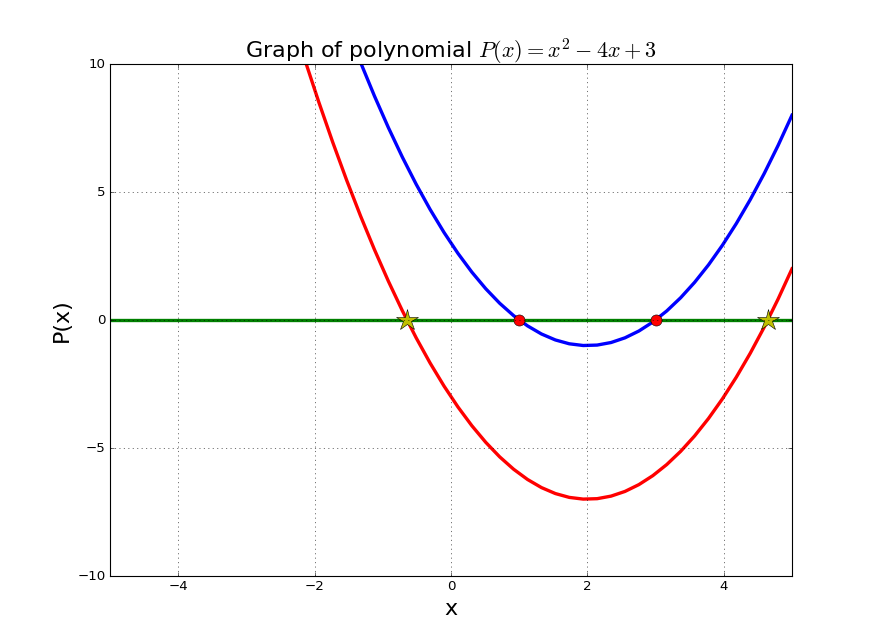

<IPython.core.display.Latex object>

Button(description='Change Constant', style=ButtonStyle())

<IPython.core.display.Latex object>

In [6]:
%matplotlib notebook

display(Latex("Where are the x-intercepts for the polynomial $x^2-4x+3$? (input your answer in the text box below the graph)"))

int_1 = str(1)
int_2 = str(3)

def click_show(b):
    plt.figure(figsize=(11,8))
    plt.plot(x,x**2  - 4*x + 3, linewidth=3);
    plt.plot(x,np.zeros(len(x)), linewidth=3);
    plt.plot(3,0,'ro',markersize=10)
    plt.plot(1,0,'ro',markersize=10)
    plt.grid(True)
    plt.ylabel('P(x)', fontsize=20)
    plt.xlabel('x', fontsize=20)
    plt.xlim([-5,5])
    plt.ylim([-10,10])
    plt.title('Graph of polynomial $P(x) = x^2 - 4x + 3$', fontsize=20)
    plt.show()
    display(Latex('Based on the previous cell, what do you think will happen if we change the constant term from $3$ to $-3$? Press the button to find out if you are correct.'))
    display(change_c)
    
def change_const(b):
    plt.plot(x,x**2 - 4*x - 3, linewidth=3)
    plt.plot(2-np.sqrt(7),0,'y*',markersize=20)
    plt.plot(2+np.sqrt(7),0,'y*', markersize=20)
    display(Latex('As we can see, changing the constant term shifts the graph of a polynomial up or down. This results in different x-intercepts, and therefore a different interval '))
    
    
display(Latex('First Intercept:'))    
guess_int_1 = str(input())

display(Latex('Second Intercept:'))
guess_int_2 = str(input())

show_int = widgets.Button(description ='Show intercepts')

if guess_int_1 == int_1 and guess_int_2 == int_2:
    display(Latex('Correct! Press the button to display the points on the graph above'))
    display(show_int)
else:
    display(Latex('Try Again!'))

show_int.on_click(click_show)

change_c = widgets.Button(description = 'Change Constant')

change_c.on_click(change_const)




Another way to think about this is that changing the constant term is the same as solving for a different interval of inequality. Take, for example the polynomials we just used above.

We know that 

$x^2-4x+3 \leq 0$ 

is **not** the same as 

$x^2-4x-3\leq 0$.

However, consider a new inequality:

$x^2 - 4x - 3 \leq -6$.

If we simplify this expression, we find

$x^2 - 4x +3 \leq 0$

which is indeed equivalent to the first polynomial (plotted in blue in the cell above).

# Practice Yourself

## Practice solving graphically

First, we will practice how to solve inequalities graphically. Below is a plot of the polynomial $P(x) = x^3 - 1x^2 - 22x + 40$. Using the graph, find the values of the three x-intercepts. Based on this, determine the interval where $P(x) \leq 0 $.

This can method can be used to solve almost any polynomial inequality, provided that the x-intercepts are rational numbers which can be easliy read off of the axes of the graph.

In [87]:
%matplotlib inline

def slider(x1,x2,x3):
    xx = np.linspace(-10,10,300)
    plt.figure(1,figsize = (10,7))
    hold = True
    plt.plot(xx,xx**3 - 1*xx**2 - 22*xx + 40,'m--', linewidth = 2, label = r'$P(x) = x^3 - 1x^2 - 22x + 40$')
    plt.plot(x1,0,'ro',markersize=10)
    plt.plot(x2,0,'bo',markersize=10)
    plt.plot(x3,0,'go',markersize=10)
    
    if x1 == -5 and x2 == 2 and x3 == 4:
        plt.text(-7,20,'VERY GOOD!', fontsize = 25, fontweight = 'bold',color = 'r')
        display(Latex('What interval then satisfies $P(x) \leq 0$?'))
        
        intvl_1=widgets.Checkbox(
        value=False, 
        description=r'$(-5,4)$', 
        disabled=False
        )
        intvl_2=widgets.Checkbox(
            value=False,
            description=r'$(-5,3)U(4,\infty)$',
            disabled=False
        )
        intvl_3=widgets.Checkbox(
            value=False,
            description=r'$(-5,2)$',
            disabled=False
        )
        intvl_4=widgets.Checkbox(
            value=False,
            description=r'$(-\infty,-5)U(2,4)$',
            disabled=False
        )
        display(intvl_1)
        display(intvl_2)
        display(intvl_3)
        display(intvl_4)
        
        def check_button2(x):
            if intvl_2.value == True and intvl_1.value==False and intvl_3.value==False and intvl_4.value==False:
                display(Latex('Correct!'))
            else: 
                display(Latex("Not quite - Check your answer again!"))

        button_check2 = widgets.Button(description="check")
        display(button_check2)
        button_check2.on_click(check_button2)

    plt.xlabel('$x$',fontsize = 14)
    plt.ylabel('$y$',fontsize = 14)
    plt.plot([-75,75],[0,0],'k-',alpha = 1,linewidth = 1)
    plt.plot([0,0],[-75,75],'k-',alpha = 1,linewidth = 1)
    plt.grid(alpha = 0.7)
    plt.xticks(np.arange(-10,11))
    plt.ylim([-75,75])
    plt.xlim([-9,9])
    plt.legend(loc = 'best', fontsize = 18)
    plt.show()

sl = interactive(slider, x1=(-10,10,1), x2=(-10,10,1), x3=(-10,10,1)) 
display(sl)


interactive(children=(IntSlider(value=0, description='x1', max=10, min=-10), IntSlider(value=0, description='x…

## Solve the inequalitites

In the next cell, we have a funciton that will generate a random polynomial of degree 2 or 3. Using the analytic steps shown above, try to solve the intervals of inequaltites for a few polynomials. Since we can always rearagne the polynomial into standard form, without loss of generality we can always take the inequaity to be $\leq 0 $ or $\geq 0 $. Re-run this function as many times as you would like, until you are comfortable with solving polynomial inequalities.

If you have trouble solving the inequality analytically, you can try to find the solution graphically, following the method in the cell above. At the bottom of this notebook, there will be some instructions on how to make basic plots with Python. Follow these steps and try to solve the inequality.

**Note**: you will need to scroll to the top of the notebook and press the 'show code' button to be able to write your own code in a cell.


In [ ]:
%matplotlib notebook 
%matplotlib notebook 

def find_interval():
    display(Latex('Provide order of polynomial:'))
    poly_order = int(input())
    check_interval = 0
    button_clicked = 0
    
    if poly_order > 3:
        display(Latex('Order of polynomial must be less than or equal to 3'))
        display(Latex('Provide order of polynomial:'))
        poly_order = input()
        
    if poly_order == 3:    
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1] + C[2]*(C[0]+C[1])
        C3 = -1*C[0]*C[1]*C[2]
        C11=C1
        C22=C2
        C33=C3
        display(Latex('Find the interval where $P(x) \geq 0 $ for $P(x)$ as given below:'))
        if C1>0:
            str1 = '+' + str(C11) + 'x^2'
        elif C1== 0:
            str1 = ''
        else:
            str1=  str(C11) + 'x^2'
        if C2>0:
            str2 = '+' + str(C22) + 'x'
        elif C2== 0:
            str2=''
        else:
            str2= str(C22) + 'x'
        if C3>0:
            str3 = '+' + str(C33)
        elif C3== 0:
            str3=''
        else:
            str3= str(C33)
        a = 'P(x)= x^3' + str1 + str2 + str3
        display(Math(a))
        def poly(x):
            return x**3 + C1*x**2 + C2*x + C3
        
    if poly_order == 2:
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1]
        C11=C1
        C22=C2
        if C1>0:
            str1 = '+' + str(C11) + 'x'
        elif C1== 0:
            str1 = ''
        else:
            str1=  str(C11) + 'x'
        if C2>0:
            str2 = '+' + str(C22)
        elif C2== 0:
            str2=''
        else:
            str2= str(C22) 
        display(Latex('Find the interval where $y \geq 0 $ for $y$ as given below:'))
        a = 'y = x^2 ' + str1 + str2
        display(Math(a))
        def poly(x):
            return x**2 + C1*x + C2
    
    Max = max(C)
    Min = min(C)
    M = [Min, Max]
    V = np.sort(C)
    eps = 0.1
    
    if poly_order ==3:
        v = V[1]
        if Max == Min and poly(Max +eps) > 0:
                          interval = '('+str(Max)+',infinity)'
        if Max == Min and poly(Max +eps) < 0:
                          interval = '(-infinity,' + str( Max)+')'
                      
        if poly(Max + eps) >0:
#         interval = '(' + str(Max) + ', infinity)'
            if v !=  Max and v!= Min:
                      interval = '('+str(Min) + ',' + str(v) + ')U(' + str(Max) + ',infinity)'
            if v == Max:
                          interval = '(' + str(Min) + ', infinity)'
            if v== Min:
                          interval = '(' + str(Max) + ', infinity)'
    
        if poly(Max + eps) <0:
#         interval = '(-infinty,' + str(Min) + ')'
            if v != Max and v != Min:
                          interval = '(-inifinity,' + str(Min) + 'U('+str(v) + ','+str(Max) + ')'
            if v == Max:
                          interval = '(-infinity,' + str( Max) + ')'
            if v == Min:
                          interval = '(-infinity,' + str(Min) + ')'
                    
    if poly_order == 2:
            if Max == Min and poly(Max+eps)>0:
                interval = '(-infinity, infinity)'
            elif poly(Max+eps)<0:
                interval = '('+str(Min)+','+str(Max)+')'
            elif poly(Max + eps)>0:
                interval = '(-infinity,'+str(Min)+')U(' + str(Max)+',infinity)'
            else:
                interval = str(Max)    

    print(interval)
    
    while  check_interval == 0:
        display(Latex('Input answer in interval notation (i.e. (-4,-1)U(5,infinity) ):'))
        interval_input = str(input())
        if interval_input == interval:
            check_interval = 1
            display(Latex("Correct! Here's a visualization of the solution:"))
            x=np.linspace(-100,100,10000)
            y= poly(x)
            plt.figure(figsize=(11,8))
            plt.plot(x,y,linewidth=3)
            plt.plot(x, np.zeros(len(x)),linewidth=3)
            plt.xlabel(r'$x$', fontsize = 20)
            plt.ylabel(r'$P(x)$', fontsize = 20)
            plt.grid(True, which='major')
            plt.xlim([-9.5,9.5])
            plt.ylim([-10,10])
            display(Latex('Above is a graph of the polynomial:'))
            display(Math(a))
            display(Latex('You can pan around the graph by clicking the fourth button (looks like a cross) and dragging the mouse around. You can zoom in to get a better look at the zeros by clicking the white square button, and making a rectangle on the plot where you want a closer look. To reset the graph back to normal, press the "home" button.'))
        else:
            display(Latex("That's not quite right, try again." ))
            continue
        
    

In [85]:
# display(Latex('Press "Shift+Enter" to run the cell'))
# find_interval()

# Plotting in Python


 To create a simple plot of a polynomial, we can run the following code:

First, we have to import the necessary libraries to create the plot. We can call the matplotlib library in the code by using the 'plt.' prefix. 

We will use the Python `matplotlib` library to plot the polynomials.

The` numpy` library is used to create an object called a 'vector' -- we use this to plot the  polynomial over some range of x:

```python
import matplotlib.pyplot as plt

import numpy as np 
```

From the `numpy` library, we call the 'linspace' funciton, which creates a list of linearaly spaced numbers. The numbers in the brackets are the starting number, the final number, and the number of points between the two. In this case, we create a list of 100 numbers equally spaced between -5 and 5. We will define this list as the variable 'x' by typing 'x=' before we call the numpy funciton:

```python
x = np.linspace(-5,5,100) 
```

Now we can use `matplotlib` functions to create the graph. Calling the `figure()` funciton creates a figure box to make the graph. To actually draw the graph, we call `plot(x,y)`, draws the graph of y as a function of x.
```python
plt.figure() 

plt.plot(x,y)  
```

When you write the code for yourself, instead of typing 'y' in the brackets, write out the actual polynomial you wish to plot. For example, if we wanted to plot $y = x^2 + 2x - 3$, our code would look like:

```python
plt.figure() 

plt.plot(x,x**2 + 2*x - 3)  
```

Notice the *syntax* of the polynomial. Double asterisks `**` are used to exponentate varaibles (i.e. $x^2$ = `x**2`), while a single asterisk `*` means multpilication in Python. Addition and subrtraction are the usual `+` and `-` symbols.

In the cell below, write out this code block, entering the polynomial you wish to solve as 'y'.

In [8]:
'''Try making your plots in this cell'''

'Try making your plots in this cell'